In [1]:
from BiSeNet.bisenet import BiSeNet_keras
import cv2
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'BiSeNet'

In [8]:
path_bisenet_weights="BiSeNet/BiSeNet_keras.h5"

In [6]:
parser_net = BiSeNet_keras()

In [9]:
parser_net.load_weights(path_bisenet_weights)

In [10]:
def normalize_input(x, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
        # x should be RGB with range [0, 255]
        return ((x / 255) - mean)  / std

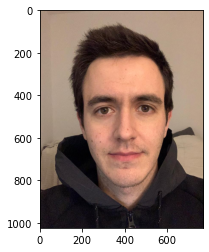

In [12]:
im = cv2.imread("rob.jpeg")[..., ::-1]
plt.imshow(im)

In [13]:
face=im
orig_h, orig_w = face.shape[:2]
inp = cv2.resize(face, (512,512))
inp = normalize_input(inp)
inp = inp[None, ...]

In [14]:
out = parser_net.predict([inp])[0]

In [15]:
parsing_map = out.argmax(axis=-1)
parsing_map = cv2.resize(
  parsing_map.astype(np.uint8), 
  (orig_w, orig_h), 
  interpolation=cv2.INTER_NEAREST)

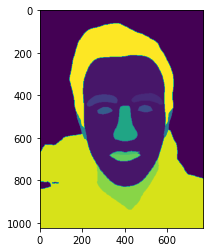

In [16]:
plt.imshow(parsing_map)

In [19]:
parser_net.save("parser_net.h5")

In [6]:
import tensorflow as tf
import keras
print ('Keras:' + keras.__version__)
print ('Tensorflow:' + tf.__version__)

Keras:2.4.3
Tensorflow:2.4.1


# Loading Model

In [25]:
from keras.models import load_model
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [26]:
def normalize_input(x, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
        # x should be RGB with range [0, 255]
        return ((x / 255) - mean)  / std

In [27]:
model = load_model('models/parser_net.h5', custom_objects={'tf': tf})
#model = load_model('models/parser_net.h5')

In [28]:
#!ls -ltr images/test/test0.jpg

In [29]:
im = cv2.imread("images/test/test1.jpg")[..., ::-1]
print("Fists:")
print(im.shape)
face=im
orig_h, orig_w = face.shape[:2]
inp = cv2.resize(face, (512,512))
inp = normalize_input(inp)
inp = inp[None, ...]
print("second:")
print(inp.shape)

Fists:
(743, 1000, 3)
second:
(1, 512, 512, 3)


In [30]:
out = model.predict([inp])[0]

In [31]:
#type(out)
#print(out.shape)

In [33]:
parsing_map = out.argmax(axis=-1)
print(parsing_map.shape)
parsing_map = cv2.resize(
  parsing_map.astype(np.uint8), 
  (orig_w, orig_h), 
  interpolation=cv2.INTER_NEAREST)

(512, 512)


In [34]:
#print(parsing_map[:,:,:10])
print(parsing_map.shape)

(743, 1000)


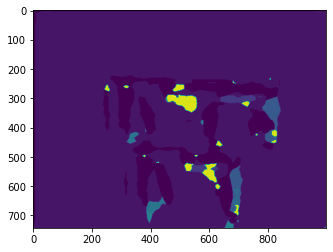

In [35]:
plt.imshow(parsing_map)

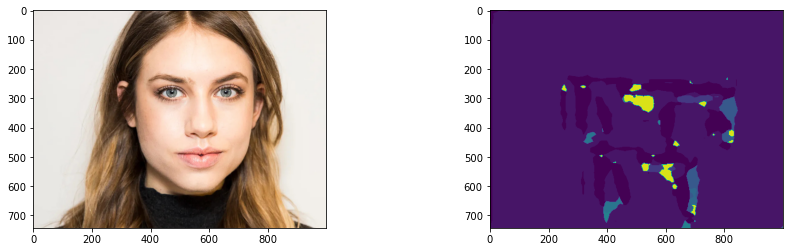

In [36]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
#plt.title("Left eye")
plt.imshow(im)

plt.subplot(1,2,2)
plt.imshow(parsing_map)